# Imports

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# Constants

In [2]:
US_STATES = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
    'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho',
    'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
    'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 
    'missouri', 'montana', 'nebraska', 'nevada', 'new-hampshire', 'new-jersey',
    'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio',
    'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina',
    'south-dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
    'washington', 'west-virginia', 'wisconsin', 'wyoming', 'district-of-columbia'
]

In [3]:
STATES_TO_FULL_NAMES = state_mapping = {
    'alabama': 'Alabama',
    'alaska': 'Alaska',
    'arizona': 'Arizona',
    'arkansas': 'Arkansas',
    'california': 'California',
    'colorado': 'Colorado',
    'connecticut': 'Connecticut',
    'delaware': 'Delaware',
    'florida': 'Florida',
    'georgia': 'Georgia',
    'hawaii': 'Hawaii',
    'idaho': 'Idaho',
    'illinois': 'Illinois',
    'indiana': 'Indiana',
    'iowa': 'Iowa',
    'kansas': 'Kansas',
    'kentucky': 'Kentucky',
    'louisiana': 'Louisiana',
    'maine': 'Maine',
    'maryland': 'Maryland',
    'massachusetts': 'Massachusetts',
    'michigan': 'Michigan',
    'minnesota': 'Minnesota',
    'mississippi': 'Mississippi',
    'missouri': 'Missouri',
    'montana': 'Montana',
    'nebraska': 'Nebraska',
    'nevada': 'Nevada',
    'new-hampshire': 'New Hampshire',
    'new-jersey': 'New Jersey',
    'new-mexico': 'New Mexico',
    'new-york': 'New York',
    'north-carolina': 'North Carolina',
    'north-dakota': 'North Dakota',
    'ohio': 'Ohio',
    'oklahoma': 'Oklahoma',
    'oregon': 'Oregon',
    'pennsylvania': 'Pennsylvania',
    'rhode-island': 'Rhode Island',
    'south-carolina': 'South Carolina',
    'south-dakota': 'South Dakota',
    'tennessee': 'Tennessee',
    'texas': 'Texas',
    'utah': 'Utah',
    'vermont': 'Vermont',
    'virginia': 'Virginia',
    'washington': 'Washington',
    'west-virginia': 'West Virginia',
    'wisconsin': 'Wisconsin',
    'wyoming': 'Wyoming',
    'district-of-columbia': 'District Of Columbia'
}


# Read 2020 Election Data

In [4]:
# Reading the file content
with open('2020_election_results.txt', 'r') as file:
    text = file.read()

In [5]:
# Regular expression pattern to match the required fields
pattern = (
    r"President:\s*(?P<state>[A-Za-z\s]+)\n"
    r"(?P<electoral_votes>\d+)\s*Electoral Votes\n"
    r"(?P<winner>Trump|Biden)\nPROJECTED WINNER\n\+ FOLLOW\n"
    r"Candidate\t%\t\tVotes\n(?:Trump|Biden)\n(?:\d+\.\d+%)?\s*\n?(?P<trump_votes>[\d,]+)\n(?:Trump|Biden)\n(?:\d+\.\d+%)?\s*\n?(?P<biden_votes>[\d,]+)"
)

In [6]:
# Compile the regex pattern
regex = re.compile(pattern)

In [7]:
# Find all matches in the text
matches = regex.findall(text)

In [8]:
# Process the matches
results = []
for match in matches:
    state = match[0]
    electoral_votes = int(match[1])
    winner = match[2]
    trump_votes = int(match[3].replace(',', ''))
    biden_votes = int(match[4].replace(',', ''))
    
    # Append the extracted information to the results list
    results.append({
        "State": state,
        "Electoral Votes": electoral_votes,
        "Winner": winner,
        "Winner Votes": trump_votes,
        "Loser Votes": biden_votes,
    })

In [9]:
voting_df = pd.DataFrame(results)

In [10]:
voting_df['Trump Votes'] = voting_df.apply(lambda row: row['Winner Votes'] if row.Winner == 'Trump' else row['Loser Votes'], 1)
voting_df['Biden Votes'] = voting_df.apply(lambda row: row['Winner Votes'] if row.Winner == 'Biden' else row['Loser Votes'], 1)

In [11]:
voting_df['Trump Electoral Votes'] = voting_df.apply(lambda row: row['Electoral Votes'] if row.Winner == 'Trump' else 0, 1)
voting_df['Biden Electoral Votes'] = voting_df.apply(lambda row: row['Electoral Votes'] if row.Winner == 'Biden' else 0, 1)

In [12]:
voting_df = voting_df[[c for c in voting_df.columns if c not in ['Winner Votes', 'Loser Votes']]]

In [13]:
voting_df.State = voting_df.State.apply(lambda x: x.split('\n')[0])

In [14]:
#there was a few states missing
missing_df = pd.DataFrame(
    columns=voting_df.columns,
    data=[['Maine', 4, 'Biden', 360737, 435072, 1, 3], ['Nebraska', 5, 'Trump', 556846, 374583, 4, 1]]
)

voting_df = pd.concat([voting_df, missing_df])

voting_df = voting_df.sort_values('State').reset_index(drop=True)

In [15]:
voting_df

,State,Electoral Votes,Winner,Trump Votes,Biden Votes,Trump Electoral Votes,Biden Electoral Votes
0,Alabama,9,Trump,1441170,849624,9,0
1,Alaska,3,Trump,189951,153778,3,0
2,Arizona,11,Biden,1661686,1672143,0,11
3,Arkansas,6,Trump,760647,423932,6,0
4,California,55,Biden,6006429,11110250,0,55
5,Colorado,9,Biden,1364607,1804352,0,9
6,Connecticut,7,Biden,714717,1080831,0,7
7,Delaware,3,Biden,200603,296268,0,3
8,District Of Columbia,3,Biden,18586,317323,0,3
9,Florida,29,Trump,5668731,5297045,29,0


# Scrape Latest State-Level Polling Data

In [16]:
def get_latest_poll(url, state):
    """
    url: a url which accepts <state> as an argument
    state: the state which to get polling data for
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the latest poll
    latest_polls = soup.find_all('tr', class_='visible-row')
    
    #if no polls, return
    if not latest_polls:
        return None

    #return format
    results_dict = {
        'State': [],
        'Date': [],
        'Sample Size': [],
        'Pollster': [],
        'Result': []
    }
    
    #populate return structure
    for latest_poll in latest_polls:
        # Extract date, sample size, pollster, sample type, and results
        date = latest_poll.find('td', class_='dates hide-mobile').get_text(strip=True)
        sample_size = latest_poll.find('td', class_='sample hide-mobile').get_text(strip=True)
        pollster = latest_poll.find('div', class_='pollster-name').get_text(strip=True)
        results = latest_poll.find('div', class_='mobile-answers-container').get_text(strip=True)

        results_dict['State'].append(STATES_TO_FULL_NAMES[state])
        results_dict['Date'].append(date)
        results_dict['Sample Size'].append(sample_size)
        results_dict['Pollster'].append(pollster)
        results_dict['Result'].append(results)
        
    return results_dict

In [17]:
def get_poll_info(state, democratic_candidate='Harris'):
    # URL of the webpage
    url = f"https://projects.fivethirtyeight.com/polls/{state}/"
    
    #get all the latest polls
    latest_polls = get_latest_poll(url, state)

    if latest_polls:
        #put in pandas dataframe
        df = pd.DataFrame(latest_polls)
        
        #only keep if the poll was between Trump and democratic_candidate
        df = df[df.Result.apply(lambda x: 'Trump' in x and democratic_candidate in x)]
        
        #sample size formatting
        df['Sample Size'] = df['Sample Size'].apply(lambda x: x.replace(',', ''))

        #if there is at least one poll between Trump and democratic_candidate...
        if len(df) >= 1:
            #get the latest poll (they're sorted by time by default)
            df = df.iloc[[0]]
            
            #get the fraction of the poll that was for democratic_candidate and Trump
            if democratic_candidate == 'Harris':
                df[f'{democratic_candidate} Poll Frac'] = df.Result.apply(lambda x: int(re.findall(r'Harris(\d+)', x)[0]) / 100)
            elif democratic_candidate == 'Biden':
                df[f'{democratic_candidate} Poll Frac'] = df.Result.apply(lambda x: int(re.findall(r'Biden(\d+)', x)[0]) / 100)
            df['Trump Poll Frac'] = df.Result.apply(lambda x: int(re.findall(r'Trump(\d+)', x)[0]) / 100)
            df = df[[c for c in df.columns if c not in ['Result']]]
            return df
        else:
            return None
    else:
        return None

In [18]:
#get the latest Harris-Trump poll for each state
state_info = []
for state in US_STATES:
    poll_info = get_poll_info(state, democratic_candidate='Harris')
    if poll_info is None:
        print(f'{state}:')
        print(f'No Trump/Harris polling data')
        poll_info = get_poll_info(state, democratic_candidate='Biden')
        if poll_info is None:
            print(f'No Trump/Biden polling data')
    state_info.append(poll_info)
state_df = pd.concat(state_info).reset_index(drop=True)

alabama:
No Trump/Harris polling data
alaska:
No Trump/Harris polling data
arkansas:
No Trump/Harris polling data
colorado:
No Trump/Harris polling data
connecticut:
No Trump/Harris polling data
No Trump/Biden polling data
delaware:
No Trump/Harris polling data
No Trump/Biden polling data
hawaii:
No Trump/Harris polling data
idaho:
No Trump/Harris polling data
illinois:
No Trump/Harris polling data
No Trump/Biden polling data
indiana:
No Trump/Harris polling data
iowa:
No Trump/Harris polling data
kansas:
No Trump/Harris polling data
kentucky:
No Trump/Harris polling data
No Trump/Biden polling data
louisiana:
No Trump/Harris polling data
maryland:
No Trump/Harris polling data
massachusetts:
No Trump/Harris polling data
mississippi:
No Trump/Harris polling data
No Trump/Biden polling data
missouri:
No Trump/Harris polling data
No Trump/Biden polling data
nebraska:
No Trump/Harris polling data
new-jersey:
No Trump/Harris polling data
north-dakota:
No Trump/Harris polling data
oklahoma:


In [19]:
state_df

,State,Date,Sample Size,Pollster,Biden Poll Frac,Trump Poll Frac,Harris Poll Frac
0,Alabama,Feb. 29-March 3,179,Florida Atlantic University PolCom Lab/Mainstr...,0.38,0.57,NaN
1,Alaska,April 16-23,250,The Bullfinch Group,0.26,0.49,NaN
2,Arizona,Aug. 6-8,1092,Trafalgar Group,NaN,0.48,0.47
3,Arkansas,Oct. 1-4,435,Emerson College,0.24,0.57,NaN
4,California,July 25-27,1904,Capitol Weekly,NaN,0.35,0.59
5,Colorado,June 17-24,800,Global Strategy Group,0.50,0.40,NaN
6,Florida,July 31-Aug. 3,976,Redfield & Wilton Strategies,NaN,0.47,0.41
7,Georgia,July 31-Aug. 3,1128,Redfield & Wilton Strategies,NaN,0.46,0.44
8,Hawaii,April 16-23,250,The Bullfinch Group,0.42,0.34,NaN
9,Idaho,Oct. 1-4,490,Emerson College,0.26,0.55,NaN


# Join the 2020 Election Data to the Latest State-Level Polling Data

In [20]:
joined = voting_df.merge(
    state_df,
    on='State',
    how='outer'
)

In [21]:
joined['Sample Size'] = joined['Sample Size'].apply(lambda x: float(x))

In [22]:
joined['exists_trump_harris_poll'] = joined.apply(lambda row: np.isnan(row['Trump Poll Frac']) == False and np.isnan(row['Harris Poll Frac']) == False, 1)
joined['exists_trump_biden_poll'] = joined.apply(lambda row: np.isnan(row['Trump Poll Frac']) == False and np.isnan(row['Biden Poll Frac']) == False, 1)

In [23]:
joined = joined.fillna(0)

In [24]:
#get the number of votes for each candidate in 2020
joined['N Votes'] = joined['Trump Votes'] + joined['Biden Votes']

In [25]:
#get the fraction of votes for each candidate in 2020
joined['Biden Vote Frac'] = joined['Biden Votes'] / joined['N Votes']
joined['Trump Vote Frac'] = joined['Trump Votes'] / joined['N Votes']

In [26]:
joined = joined.reset_index(drop=True)

In [28]:
#rebalance the polls to assume it's a race between just Trump and Harris or Trump and Biden
joined['Poll Sum Frac'] = joined.apply(lambda row: np.nansum([row['Harris Poll Frac'], row['Trump Poll Frac'], row['Biden Poll Frac']]), 1)
joined['Harris Poll Frac'] = joined['Harris Poll Frac'] / joined['Poll Sum Frac']
joined['Trump Poll Frac'] = joined['Trump Poll Frac'] / joined['Poll Sum Frac']
joined['Biden Poll Frac'] = joined['Biden Poll Frac'] / joined['Poll Sum Frac']

In [29]:
#from latest data here:
#https://projects.fivethirtyeight.com/polls/president-general/2024/national/
HARRIS_NATIONAL_POLL_FRAC = 0.456
TRUMP_NATIONAL_POLL_FRAC = 0.435

# Simulating 2024 Election Based on 2020 Election and Recent Polling

In [30]:
def simulate_election(df, weight_vote, weight_poll, baseline_uncertainty=None, return_alphas_betas=False):
    """
    this function simulates an election using the joined dataframe df
    weight_vote is our level of trust on the 2020 election being predictive of the 2024 election
    weight_poll is our level of trust in the most recent polling data being predictive of the 2024 election
    """
    
    """
    in a Beta(alpha, beta) distribution:
    - alpha is the number of "successes" + 1
    - beta is the number of "failures" + 1
    here we'll thus set:
    - alpha as the weighted average number of voters who'd vote for Harris
    - beta as the weighted average number of voters who'd vote for Trump
    these weighted averages use the weight_vote and weight_poll we defined in the arguments
    """
    
    #get indices for each logical polling situation
    exists_trump_harris_polling = df.exists_trump_harris_poll.values
    exists_trump_biden_polling = df.exists_trump_biden_poll.values
    not_exists_polling = (~exists_trump_harris_polling) & (~exists_trump_biden_polling)
    
    #if we're not encforcing uncertainty, use sample size as number of votes
    if baseline_uncertainty is None:
        n_votes_vals = df['N Votes']
    #otherwise, set sample size to allow uncertainty to be set at the given value
    #if no Trump/Harris poll for a state, but there is Trump/Biden poll, 1.5x the uncertainty
    #if no poll for a state, 2x the uncertainty
    else:
        n_votes_vals = 1/(4*baseline_uncertainty**2) - 3
        n_votes_missing_harris_polling_vals = 1/(4*(1.5*baseline_uncertainty)**2) - 3
        n_votes_missing_polling_vals = 1/(4*(2*baseline_uncertainty)**2) - 3
     
    #posterior alphas and betas for the Beta distribution of p(Harris) winning
    alphas = weight_vote * n_votes_vals * df['Biden Vote Frac'] + weight_poll * n_votes_vals * df['Harris Poll Frac'] + 1
    
    betas = weight_vote * n_votes_vals * df['Trump Vote Frac'] + weight_poll * n_votes_vals * df['Trump Poll Frac'] + 1
    
    #for states that do not have Trump/Harris polling but do have Trump/Biden polling
    alphas[exists_trump_biden_polling] = weight_vote * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Biden Vote Frac'] + weight_poll * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Biden Poll Frac'] + 1
    betas[exists_trump_biden_polling] = weight_vote * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Trump Vote Frac'] + weight_poll * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Trump Poll Frac'] + 1
    
    #for states that have no polling data at all
    alphas[not_exists_polling] = weight_vote * n_votes_missing_polling_vals * df.iloc[not_exists_polling]['Biden Vote Frac'] + weight_poll * n_votes_missing_polling_vals * HARRIS_NATIONAL_POLL_FRAC + 1
    betas[not_exists_polling] = weight_vote * n_votes_missing_polling_vals * df.iloc[not_exists_polling]['Trump Vote Frac'] + weight_poll * n_votes_missing_polling_vals * TRUMP_NATIONAL_POLL_FRAC + 1

    #using these alphas and betas, simulate the probability that Harris would win
    p_wins = [np.random.beta(a,b) for a,b in zip(alphas, betas)]
    harris_wins = np.array([p > 0.5 for p in p_wins])
    harris_evotes = df[harris_wins]['Electoral Votes'].sum()
    trump_evotes = df[~harris_wins]['Electoral Votes'].sum()
    
    if return_alphas_betas:
        return harris_evotes, trump_evotes, alphas, betas
    return harris_evotes, trump_evotes 

In [31]:
#number of simulations
n_sims = 100

In [32]:
#set the baseline uncertainty (this should get lower as we get closer to election day)
BASELINE_UNCERTAINTY = 0.02

In [33]:
results = []
#iterate over several choice of voting and polling weights
for weight_vote in np.arange(0.01, 1.01, 0.01):
    weight_vote = round(weight_vote, 10)
    weight_poll = round(1-weight_vote, 10)
    if weight_poll < 0:
        continue
    
    print(weight_vote, weight_poll)
    #do n_sims simulations
    for _ in range(n_sims):
        harris_evotes, trump_evotes = simulate_election(joined, weight_vote, weight_poll, BASELINE_UNCERTAINTY)
        results.append([weight_vote, weight_poll, harris_evotes, trump_evotes])
results = pd.DataFrame(columns=['weight_vote', 'weight_poll', 'harris_evotes', 'trump_evotes'], data=results)

0.01 0.99
0.02 0.98
0.03 0.97
0.04 0.96
0.05 0.95
0.06 0.94
0.07 0.93
0.08 0.92
0.09 0.91
0.1 0.9
0.11 0.89
0.12 0.88
0.13 0.87
0.14 0.86
0.15 0.85
0.16 0.84
0.17 0.83
0.18 0.82
0.19 0.81
0.2 0.8
0.21 0.79
0.22 0.78
0.23 0.77
0.24 0.76
0.25 0.75
0.26 0.74
0.27 0.73
0.28 0.72
0.29 0.71
0.3 0.7
0.31 0.69
0.32 0.68
0.33 0.67
0.34 0.66
0.35 0.65
0.36 0.64
0.37 0.63
0.38 0.62
0.39 0.61
0.4 0.6
0.41 0.59
0.42 0.58
0.43 0.57
0.44 0.56
0.45 0.55
0.46 0.54
0.47 0.53
0.48 0.52
0.49 0.51
0.5 0.5
0.51 0.49
0.52 0.48
0.53 0.47
0.54 0.46
0.55 0.45
0.56 0.44
0.57 0.43
0.58 0.42
0.59 0.41
0.6 0.4
0.61 0.39
0.62 0.38
0.63 0.37
0.64 0.36
0.65 0.35
0.66 0.34
0.67 0.33
0.68 0.32
0.69 0.31
0.7 0.3
0.71 0.29
0.72 0.28
0.73 0.27
0.74 0.26
0.75 0.25
0.76 0.24
0.77 0.23
0.78 0.22
0.79 0.21
0.8 0.2
0.81 0.19
0.82 0.18
0.83 0.17
0.84 0.16
0.85 0.15
0.86 0.14
0.87 0.13
0.88 0.12
0.89 0.11
0.9 0.1
0.91 0.09
0.92 0.08
0.93 0.07
0.94 0.06
0.95 0.05
0.96 0.04
0.97 0.03
0.98 0.02
0.99 0.01
1.0 0.0


In [34]:
#aggreate based on weight of polling data
stats = results.groupby(
    'weight_poll'
).agg(
    avg_harris_evotes = pd.NamedAgg('harris_evotes', np.mean),
    dev_harris_evotes = pd.NamedAgg('harris_evotes', np.std),
    avg_trump_evotes = pd.NamedAgg('trump_evotes', np.mean),
    dev_trump_evotes = pd.NamedAgg('trump_evotes', np.std),
).reset_index()

# Plot Result

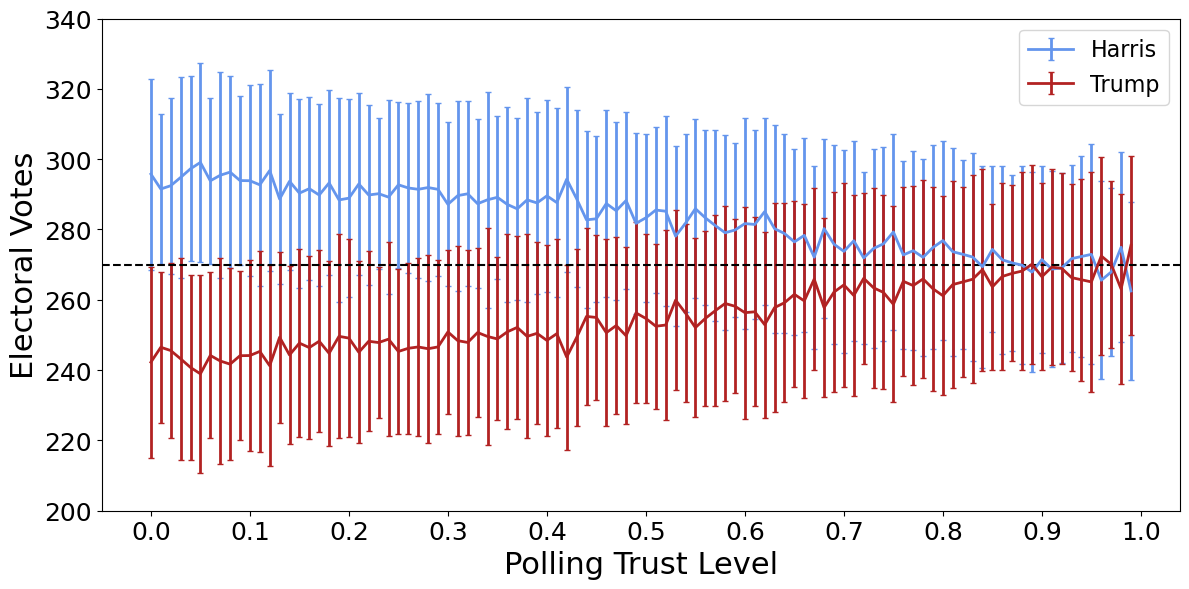

In [39]:
plt.figure(figsize=(12,6))
plt.errorbar(stats.weight_poll, stats.avg_harris_evotes, yerr=stats.dev_harris_evotes, color='cornflowerblue', linewidth=2, capsize=2)
plt.errorbar(stats.weight_poll, stats.avg_trump_evotes, yerr=stats.dev_trump_evotes, color='firebrick', linewidth=2, capsize=2)
plt.legend(['Harris', 'Trump'], fontsize=16, loc=1)
plt.axhline(270, color='k', linestyle='--')
plt.ylim(200, 340)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.xlabel('Polling Trust Level', fontsize=22)
plt.yticks(np.arange(200, 350, 20), fontsize=18)
plt.ylabel('Electoral Votes', fontsize=22)
plt.tight_layout()
plt.savefig('election_simulations.png', dpi=250)